### Resources

Information about minst dataset

https://chromium.googlesource.com/external/github.com/tensorflow/tensorflow/+/r0.7/tensorflow/g3doc/tutorials/mnist/beginners/index.md

### Multilayer Neural Networks
We build multilayer neural networks with TensorFlow. Adding a hidden layer to a network allows it to model more complex functions. Also, using a non-linear activation function on the hidden layer lets it model non-linear functions.
We will see how a ReLU hidden layer is implemented in TensorFlow.


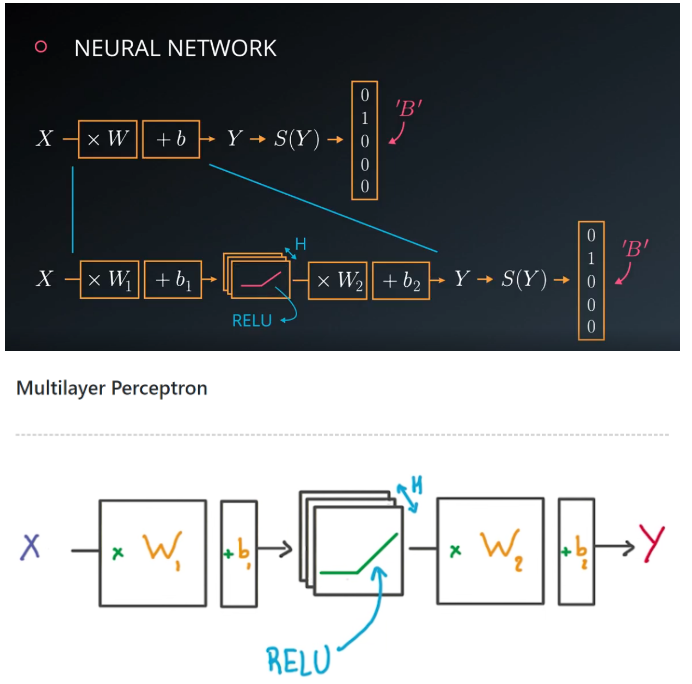

### ReLU

A Rectified linear unit (ReLU) is type of activation function that is defined as f(x) = max(0, x). The function returns 0 if x is negative, otherwise it returns x. TensorFlow provides the ReLU function as tf.nn.relu(), as shown below



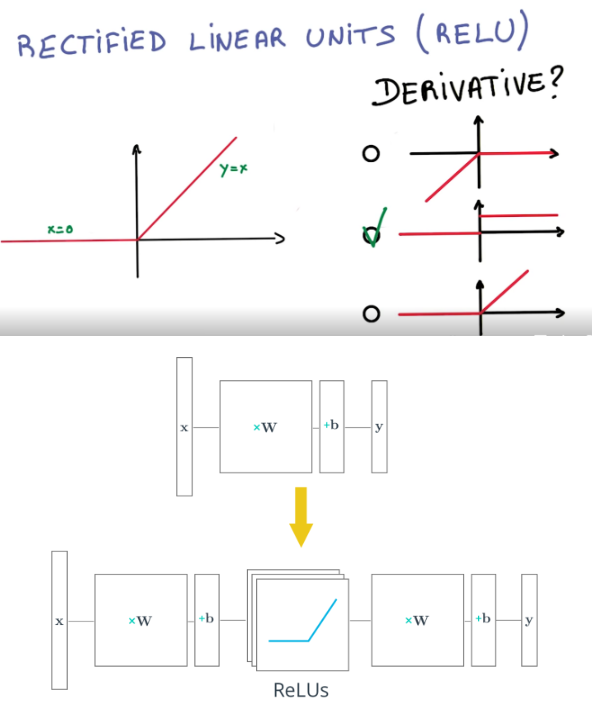

### Hidden Layer with ReLU activation function

hidden_layer = tf.add(tf.matmul(features, hidden_weights), hidden_biases)

hidden_layer = tf.nn.relu(hidden_layer)

output = tf.add(tf.matmul(hidden_layer, output_weights), output_biases)



In [50]:
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

In [38]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()


# Flattening the matrix for training set and test set
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 


# one hot encoding for the lables in train and test
temp_train = np.zeros([y_train.shape[0],y_train.max()+1],dtype = np.float32)
temp_train[np.arange(y_train.shape[0]),y_train] = 1
y_train = temp_train

temp_test = np.zeros([y_test.shape[0],y_test.max()+1],dtype = np.float32)
temp_test[np.arange(y_test.shape[0]),y_test] = 1
y_test = temp_test


# Parameters
learning_rate = 0.001
training_epochs = 20
display_step = 1


n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)



### Weights and biases
Deep neural networks use multiple layers with each layer requiring it's own weight and bias. The 'hidden_layer' weight and bias is for the hidden layer. The 'out' weight and bias is for the output layer. If the neural network were deeper, there would be weights and biases for each additional layer.



In [39]:

# Store layers weight & bias
# Below we can observe that Matrix multiplication of (n_input, n_hidden_layer) * (n_hidden_layer, n_classes)
# Will give a resultant Matrix of (n_input, n_classes) at the end which is what exactly we want

n_hidden_layer = 256 # layer number of features

weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])), 
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [40]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

# Output layer with linear activation
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

batch_size = 128  # Decrease batch size if you don't have enough memory

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for batch_x, batch_y in batches(batch_size, x_train, y_train):
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


### Training a Deep neural network

Increasing the size of Hidden Layer H is not efficient. Instead we can add more layers to make it more deep.
Deeper is better than Wider as it increases Parameter Efficiency i.e we get better performace with fewer parameters.



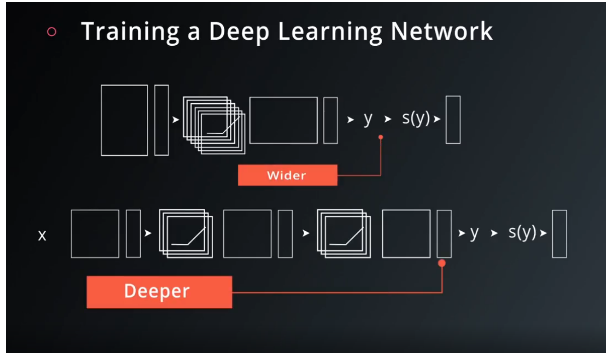

Lots of natural phenomenon tend to have heirarchial structure which deep learning model captures
For Example in images, in lowest layers model detects line and edges but as we go up it matches the objects, faces.
It Matches the abstraction you see in your data therefore it has easier time learning them.

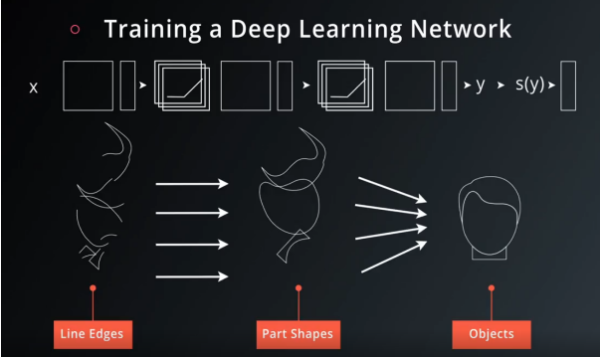


### Save and Restore TensorFlow Models

Training a model can take hours. But once you close your TensorFlow session, you lose all the trained weights and biases. If you were to reuse the model in the future, you would have to train it all over again!

Fortunately, TensorFlow gives you the ability to save your progress using a class called tf.train.Saver. This class provides the functionality to save any tf.Variable to your file system.

A file called "model.ckpt.meta" will also be created. This file contains the TensorFlow graph. The ".ckpt" extension stands for "checkpoint".

In [45]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# The file path to save the data
save_file = './model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Initialize all the Variables
    sess.run(tf.global_variables_initializer())

    # Show the values of weights and bias
    print('Weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

    # Save the model
    saver.save(sess, save_file)


Weights:
[[ 1.1498646   1.2468457  -0.9090501 ]
 [ 0.46111092  0.28077614 -0.9272172 ]]
Bias:
[ 1.0950052  -0.5357298  -0.03686653]


### Restoring our saved model
Since tf.train.Saver.restore() sets all the TensorFlow Variables, you don't need to call tf.global_variables_initializer().



In [46]:
# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)

    # Show the values of weights and bias
    print('Weight:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))


INFO:tensorflow:Restoring parameters from ./model.ckpt
Weight:
[[-0.111722   -0.8015523  -0.97459435]
 [ 0.06499092  0.51301175 -0.22152863]]
Bias:
[-0.28381923 -0.7484075  -0.24590367]


In [51]:
# Remove previous Tensors and Operations
tf.reset_default_graph()

import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()


# Flattening the matrix for training set and test set
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 


# one hot encoding for the lables in train and test
temp_train = np.zeros([y_train.shape[0],y_train.max()+1],dtype = np.float32)
temp_train[np.arange(y_train.shape[0]),y_train] = 1
y_train = temp_train

temp_test = np.zeros([y_test.shape[0],y_test.max()+1],dtype = np.float32)
temp_test[np.arange(y_test.shape[0]),y_test] = 1
y_test = temp_test

# Parameters
learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)
training_epochs = 100


# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Store layers weight & bias
# Below we can observe that Matrix multiplication of (n_input, n_hidden_layer) * (n_hidden_layer, n_classes)
# Will give a resultant Matrix of (n_input, n_classes) at the end which is what exactly we want

n_hidden_layer = 256 # layer number of features

weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])), 
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

# Output layer with linear activation
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

save_file = './train_model.ckpt'

batch_size = 128  # Decrease batch size if you don't have enough memory

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for batch_x, batch_y in batches(batch_size, x_train, y_train):
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

        # Print status for every 10 epochs
        if epoch % 10 == 0:
            valid_accuracy = sess.run(
                accuracy,
                feed_dict={
                    features: x_test,
                    labels: y_test})
            print('Epoch {:<3} - Validation Accuracy: {}'.format(
                epoch,
                valid_accuracy))

    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')


Epoch 0   - Validation Accuracy: 0.10840000212192535
Epoch 10  - Validation Accuracy: 0.10840000212192535
Epoch 20  - Validation Accuracy: 0.10840000212192535
Epoch 30  - Validation Accuracy: 0.10840000212192535
Epoch 40  - Validation Accuracy: 0.10840000212192535
Epoch 50  - Validation Accuracy: 0.10840000212192535
Epoch 60  - Validation Accuracy: 0.10840000212192535
Epoch 70  - Validation Accuracy: 0.10840000212192535
Epoch 80  - Validation Accuracy: 0.10840000212192535
Epoch 90  - Validation Accuracy: 0.10840000212192535
Trained Model Saved.


In [52]:
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: x_test, labels: y_test})

print('Test Accuracy: {}'.format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./train_model.ckpt
Test Accuracy: 0.10840000212192535


### Finetuning
Loading the Weights and Biases into a New Model

Sometimes you might want to adjust, or "finetune" a model that you have already trained and saved.

However, loading saved Variables directly into a modified model can generate errors. Let's go over how to avoid these problems.



loading saved Variables directly into a modified model can generate errors to go overcome this problem we will set name properties for weights and bias.

You'll notice that the name properties for weights and bias are different than when you saved the model. This is why the code produces the "Assign requires shapes of both tensors to match" error. The code saver.restore(sess, save_file) is trying to load weight data into bias and bias data into weights.

Instead of letting TensorFlow set the name property, let's set it manually:



In [56]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]), name='weights_0')
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)

# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')
weights = tf.Variable(tf.truncated_normal([2, 3]) ,name='weights_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, save_file)

print('Loaded Weights and Bias successfully.')


Save Weights: weights_0:0
Save Bias: bias_0:0
Load Weights: weights_0:0
Load Bias: bias_0:0
INFO:tensorflow:Restoring parameters from model.ckpt
Loaded Weights and Bias successfully.


### Regularization

In order to prevent over optimizing (just like overfitting in linear regression) on our training set. We do this by seeing our performance on our validation set and stop training as soon as our performance stops improving. It's called Early termination.


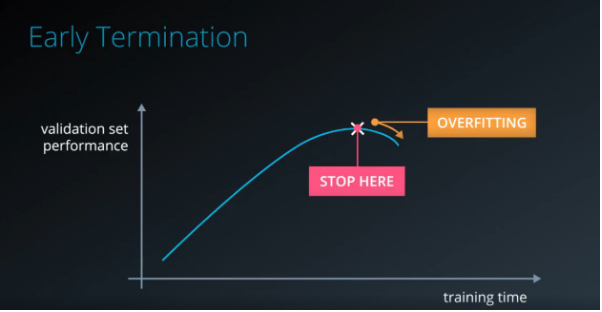

Regularization 

In Regularization we add another term to the loss which penalizes weights. For example in Linear regression the overfit model will have higher order parameters to fit every data. In that case we can add higher order parameters to our loss function to penalize it. So our optimization will try to reduce it in order to reduce the loss. So this reduces our model from overfitting. This way we can have model that is not overfit or underfit. 

In L1 Regularization we will add the hyperparameters as it is to Loss. Whereas in L2 regularization we will take square of those parameters and add in our loss function.

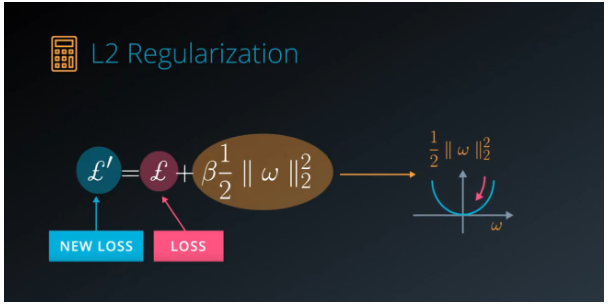

Remeber L2 norm stands for the sum of the squares of individual element in the vector.


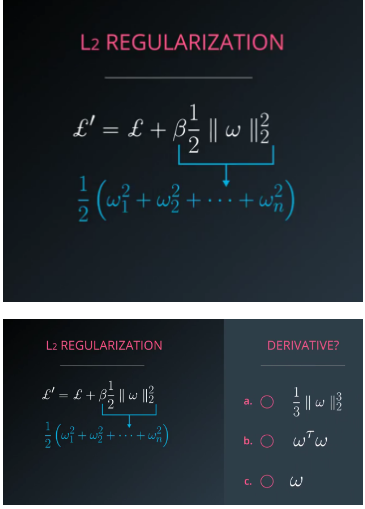


Ensemble Learner


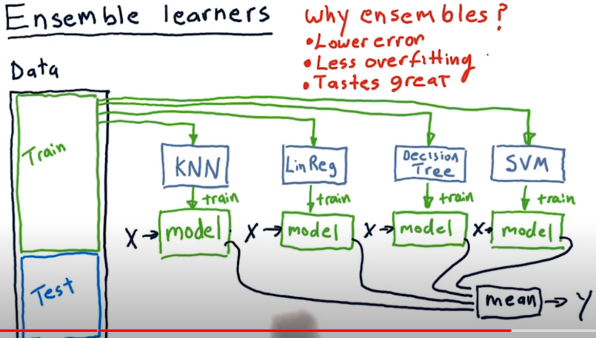

### Dropout (another technique for regularization)

The Values that goes from one layer to another is often called Activation. So in dropout what we do is we randomly select and set half of the activation to Zero i.e we are randomly destroying the data flowing in our neural network. What this does is it pushes our model to rely on redundant activations.



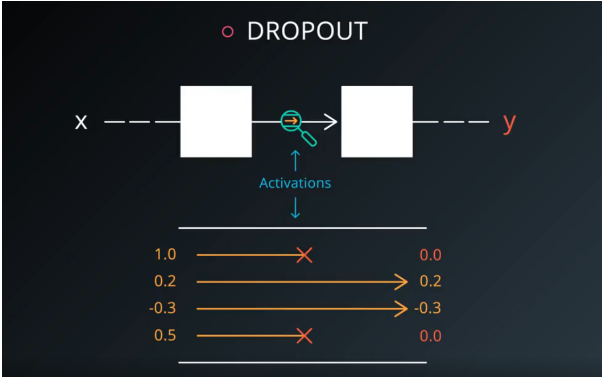

Some Activations get dropped but there is always one or more same Activations that dosen't gets killed and model is forced to rely on them.

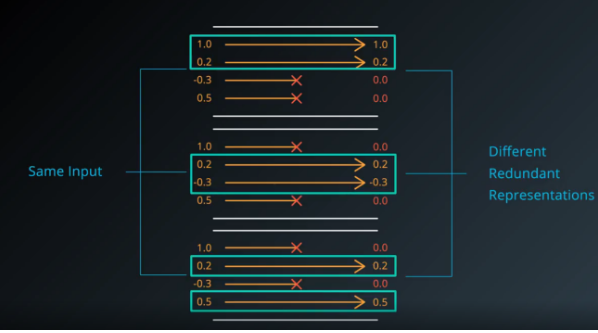

It acts similar to taking consensous over a Ensemble of Networks to improve the performance.

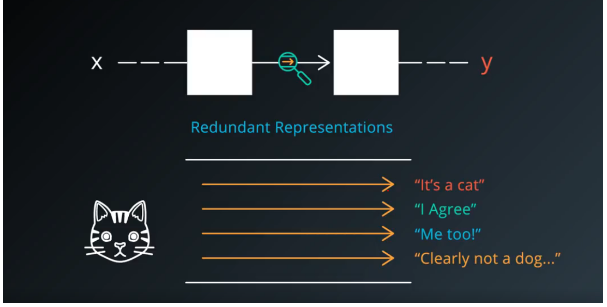

If dropout Also dosen't work for you then you might want to switch to bigger network

After implementing we expect something deterministic rather than randomness. To achieve this we will take Average of all the activations in training in our evaluation and during training we not only zero out the activations we dropout but we also scale the remaining activations by 2.

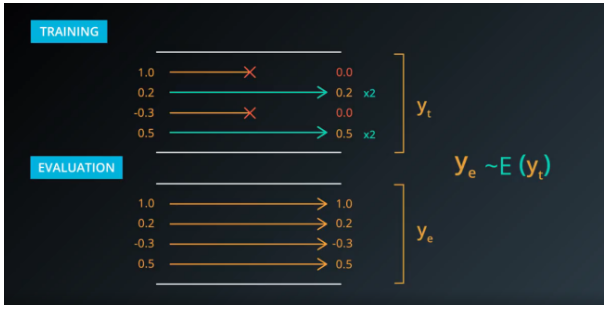

### Tenserflow Dropout

Dropout is a regularization technique for reducing overfitting. The technique temporarily drops units (artificial neurons) from the network, along with all of those units' incoming and outgoing connections. 

TensorFlow provides the tf.nn.dropout() function, which you can use to implement dropout.


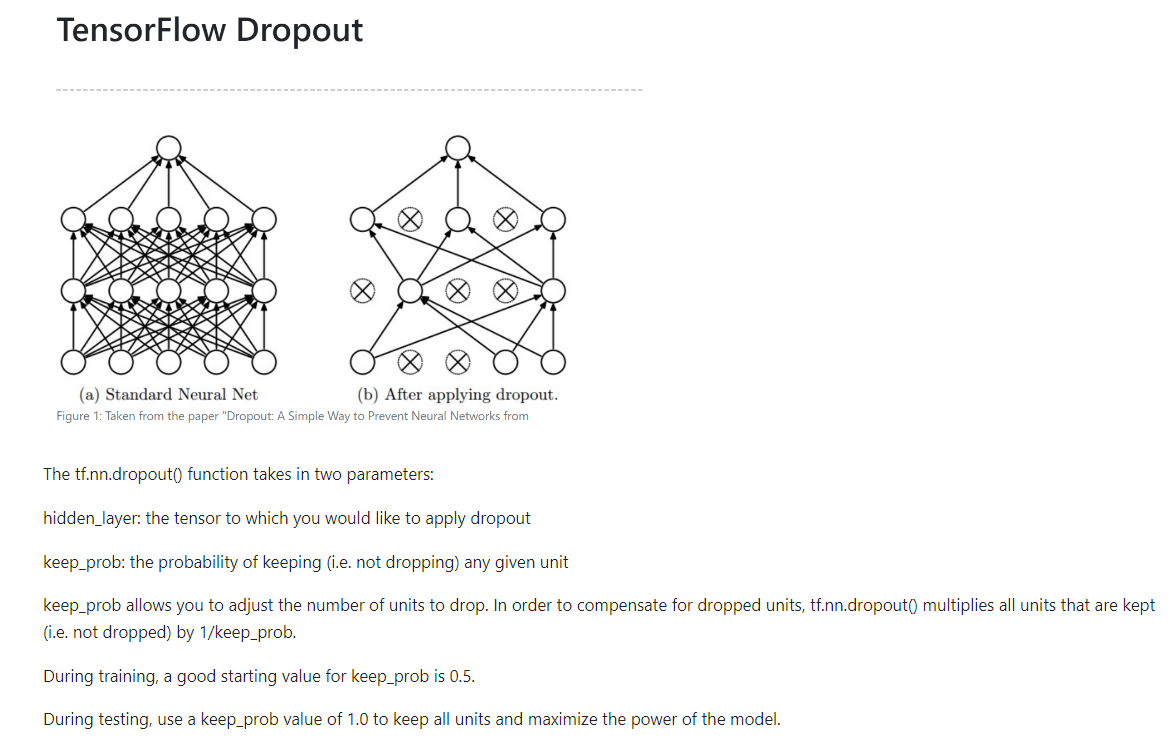



The tf.nn.dropout() function takes in two parameters:

hidden_layer: the tensor to which you would like to apply dropout

keep_prob: the probability of keeping (i.e. not dropping) any given unit

keep_prob allows you to adjust the number of units to drop. In order to compensate for dropped units, tf.nn.dropout() multiplies all units that are kept (i.e. not dropped) by 1/keep_prob.

During training, a good starting value for keep_prob is 0.5.

During testing, use a keep_prob value of 1.0 to keep all units and maximize the power of the model.
